In [14]:
#Splitting von MERGED_DATA.csv in die jeweiligen Warengruppen
#Kann bei Bedarf in das Baseline-Modell Notebook kopiert

import pandas as pd
import numpy as np

#Laden des merged_data.csv
merged_data_csv = "/workspaces/DS_ML_Gr_1.5/0_DataPreparation/merged_data_filled.csv"
df_merged_data = pd.read_csv(merged_data_csv)

df = pd.DataFrame(df_merged_data)

#Bennenung der Warengruppne für dataframe Namen
warengruppe_namen = {

    1: 'Brot',
    2: 'Broetchen',
    3: 'Crossaint',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# DataFrames dynamisch mit Namen erstellen
for i, name in warengruppe_namen.items():
    var_name = f"df_{name}_W{i}"  # Name erstellen nach: df_Brot_W1
    globals()[var_name] = df[df['Warengruppe'] == i]

# Ergebnisse ausgeben
print("df_Brot_W1:")
print(df_Brot_W1["Warengruppe"]) #Luisa

print("df_Broetchen_W2:")
print(df_Broetchen_W2["Warengruppe"]) #Luisa

print("df_Crossaint_W3:")
print(df_Crossaint_W3["Warengruppe"]) #Nina

print("df_Konditorei_W4:")
print(df_Konditorei_W4["Warengruppe"]) #Wiebke

print("df_Kuchen_W5:")
print(df_Kuchen_W5["Warengruppe"]) #Nina

print("df_Saisonbrot_W6:")
print(df_Saisonbrot_W6["Warengruppe"]) #Wiebke

#Hier bekommt man nur die Warengruppenspalte und nicht den Rest, habe das in meinen Baseline Modellen so gemacht:
# Load the dataset 

#data1=pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/merged_data_new.csv")
#Warengruppe=4
#data = data1[data1['Warengruppe'] == Warengruppe]
#print (data.head())

df_Brot_W1:
0       1.0
8       1.0
10      1.0
18      1.0
20      1.0
       ... 
9347    1.0
9356    1.0
9357    1.0
9365    1.0
9368    1.0
Name: Warengruppe, Length: 1819, dtype: float64
df_Broetchen_W2:
1       2.0
9       2.0
11      2.0
19      2.0
21      2.0
       ... 
9348    2.0
9355    2.0
9358    2.0
9364    2.0
9369    2.0
Name: Warengruppe, Length: 1819, dtype: float64
df_Crossaint_W3:
2       3.0
6       3.0
12      3.0
16      3.0
22      3.0
       ... 
9349    3.0
9354    3.0
9359    3.0
9366    3.0
9370    3.0
Name: Warengruppe, Length: 1819, dtype: float64
df_Konditorei_W4:
3       4.0
7       4.0
13      4.0
17      4.0
23      4.0
       ... 
9350    4.0
9353    4.0
9360    4.0
9363    4.0
9371    4.0
Name: Warengruppe, Length: 1766, dtype: float64
df_Kuchen_W5:
4       5.0
5       5.0
14      5.0
15      5.0
24      5.0
       ... 
9351    5.0
9352    5.0
9361    5.0
9362    5.0
9367    5.0
Name: Warengruppe, Length: 1819, dtype: float64
df_Saisonbrot_W6:
567 

In [15]:
%pip install statsmodels
# Import necessary libraries
import pandas as pd  # For data manipulation and handling
import statsmodels.formula.api as smf  # For statistical modeling

# Load the dataset 
data=pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/umsatzdaten_codiert.csv")

# Fit a linear regression model
# - 'Umsatz' is the dependent variable (target) we aim to predict.
# - 'Warengruppe' represents the size of neighboring lots (continuous feature). (Stimmt zwar nicht, aber erstmal so als Beispiel)
# - 'C(Wochentag)' treats the 'Wochentag' feature as a categorical variable.
mod = smf.ols('Umsatz ~ Warengruppe+C(Wochentag)', data=data).fit()

# Output the summary of the fitted model
# The summary includes key metrics such as R-squared, coefficients, and p-values.
print(mod.summary())


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     42.71
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           9.76e-60
Time:                        15:59:22   Log-Likelihood:                -59520.
No. Observations:                9334   AIC:                         1.191e+05
Df Residuals:                    9326   BIC:                         1.191e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                c

         Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
2   2013-07-01            1.53          0                0      0   
6   2013-07-02            1.53          0                0      0   
12  2013-07-03            1.53          0                0      0   
16  2013-07-04            1.53          0                0      0   
22  2013-07-05            1.53          0                0      0   

   Faehrverkaehr  Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  Monday  \
2      1.576.718           419.447     17.8375    7.0     Sommer  ...     1.0   
6      1.576.718           419.447     17.3125    7.0     Sommer  ...     0.0   
12     1.576.718           419.447     21.0750    7.0     Sommer  ...     0.0   
16     1.576.718           419.447     18.8500    7.0     Sommer  ...     0.0   
22     1.576.718           419.447     19.9750    7.0     Sommer  ...     0.0   

    Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  Schulferien  \
2       0.0        0.0 

/tmp/ipykernel_8559/3742684327.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Datum'] = pd.to_datetime(data['Datum'])
/tmp/ipykernel_8559/3742684327.py:98: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


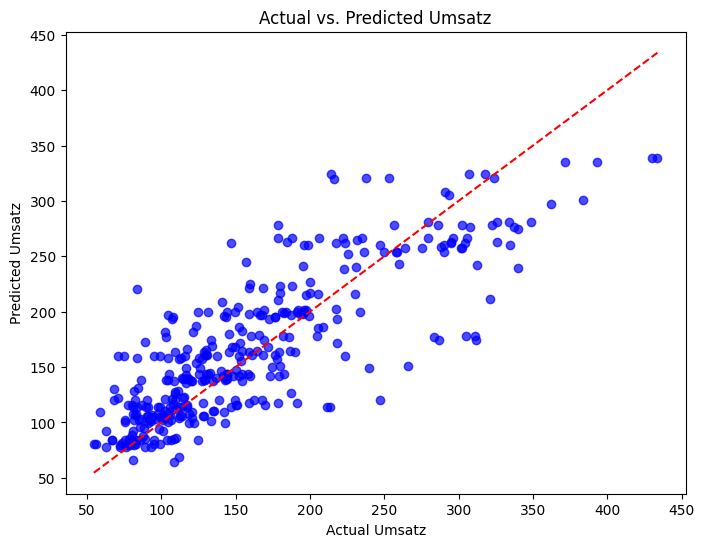

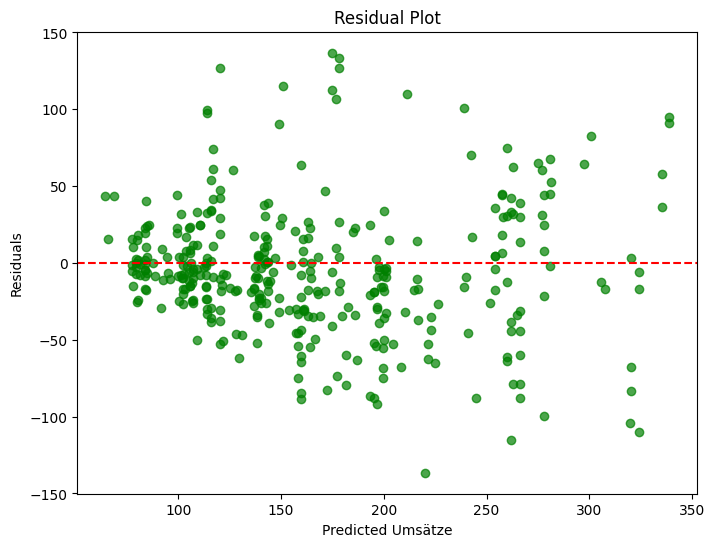

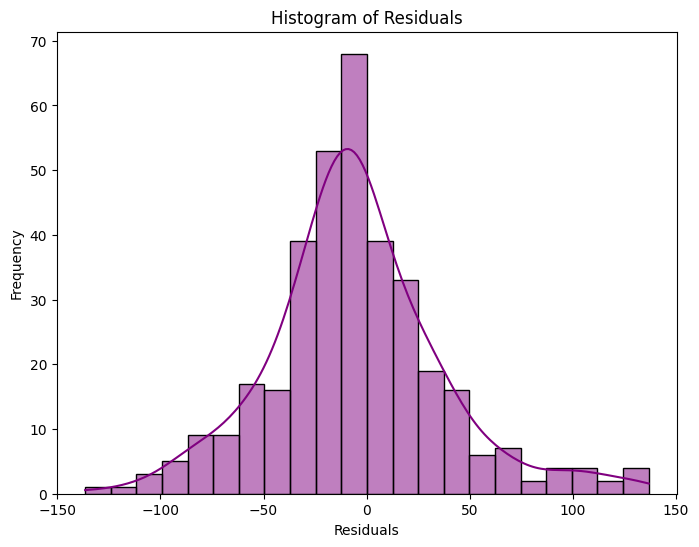

/tmp/ipykernel_8559/3742684327.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")


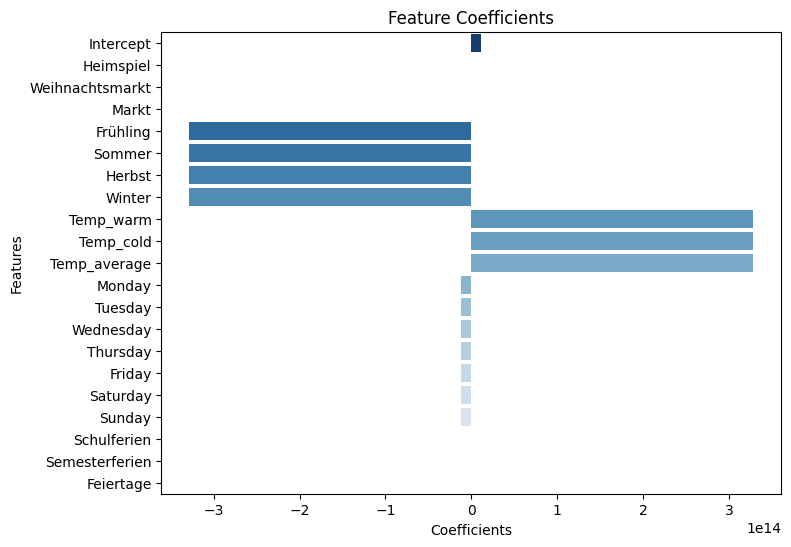

In [16]:

# Import necessary libraries
import pandas as pd  # Data manipulation and handling
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Advanced data visualizations

# Load the dataset 
data=df_Crossaint_W3

# Display the first few rows of the dataset for inspection
print(data.head())

# Select features and target variable
# Features include the different Warengruppen, Monday y/n

#features = ['Sommer','Winter','Frühling','Herbst','Saturday','Sunday']
features = ['Heimspiel',
 'Weihnachtsmarkt',
 'Markt',
 'Frühling',
 'Sommer',
 'Herbst',
 'Winter',
 'Temp_warm',
 'Temp_cold',
 'Temp_average',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Schulferien',
 'Semesterferien',
 'Feiertage']
#features = ['Sommer',
#            'Winter',
#            'Frühling',
#            'Herbst',
#            'Temp_average',
#            'Temp_warm',
#            'Temp_cold',
#           'Feiertage']


X = data[features] #target variable: Umsatz

# Scale the feature data to standardize the range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']
#X_test = test_data[features] erstmal so, da die gewünschten daten, keine Daten für test Daten übrig lassen
#y_test = test_data['Umsatz']




# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(X_train)

# Train the linear regression model using Statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)  # Add constant to test set for predictions
predictions = model.predict(X_test)
print("Predictions for test data:", predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((y_test - predictions) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Scatter plot: Actual vs. Predicted Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsatz")
plt.ylabel("Predicted Umsatz")
plt.title("Actual vs. Predicted Umsatz")
plt.show()

# Calculate residuals (differences between actual and predicted Umsätze)
residuals = y_test - predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

In [17]:
list(df_Crossaint_W3)

['Datum',
 'Inflationsrate',
 'Heimspiel',
 'Weihnachtsmarkt',
 'Markt',
 'Faehrverkaehr',
 'Kreuzfahrverkehr',
 'Temperatur',
 'Monat',
 'Jahreszeit',
 'Frühling',
 'Sommer',
 'Herbst',
 'Winter',
 'Temp_warm',
 'Temp_cold',
 'Temp_average',
 'Warengruppe',
 'Umsatz',
 'Wochentag',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Schulferien',
 'Semesterferien',
 'Feiertage']

In [19]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and hyperparameter tuning
from sklearn.linear_model import Ridge  # Ridge Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics


# Load the dataset 
data=df_Crossaint_W3

# Display the first few rows of the dataset for inspection
print(data.tail())

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Heimspiel',
 'Weihnachtsmarkt',
 'Markt',
 'Frühling',
 'Sommer',
 'Herbst',
 'Winter',
 'Temp_warm',
 'Temp_cold',
 'Temp_average',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Schulferien',
 'Semesterferien',
 'Feiertage']
X = data[features] #target variable: Umsatz
y = data['Umsatz']  # Target variable: house price

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'
test_end_date='2019-07-30'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[(data['Datum'] > validation_end_date) & (data['Datum'] <= test_end_date)]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_validation = validation_data[features]
y_validation = validation_data['Umsatz']
X_test = test_data[features] 
y_test = test_data['Umsatz']

# Initialize Ridge Regression model
ridge = Ridge()

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Testing a range of regularization strengths
}

# Create a GridSearchCV object for hyperparameter tuning
# - cv=5: 5-fold cross-validation
# - scoring='neg_mean_absolute_error': Metric for selecting the best model (negative MAE)
# - verbose=1: Display progress during grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Train Ridge Regression model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

print(predictions)


# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, predictions)  # Mean Squared Error
mape = (abs((y_test - predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Output evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


          Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
9349 2018-07-27             0.0          0                0      0   
9354 2018-07-28             0.0          0                0      0   
9359 2018-07-29             0.0          0                0      0   
9366 2018-07-30             0.0          0                0      0   
9370 2018-07-31             0.0          0                0      0   

     Faehrverkaehr  Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  \
9349             0               0.0     27.5875    7.0     Sommer  ...   
9354             0               0.0     28.7500    7.0     Sommer  ...   
9359             0               0.0     24.5500    7.0     Sommer  ...   
9366             0               0.0     27.7875    7.0     Sommer  ...   
9370             0               0.0     31.2875    7.0     Sommer  ...   

      Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
9349     0.0      0.0        0.0       0.0     1.0      

/tmp/ipykernel_8559/1314975401.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Datum'] = pd.to_datetime(data['Datum'])


ValueError: Found array with 0 sample(s) (shape=(0, 20)) while a minimum of 1 is required by Ridge.

In [13]:
#Datum zu predicted Umsatzdaten hinzufügen

# Startdatum von test_data angeben
startdatum = np.datetime64('2018-08-01')

# Erstelle ein Array von Datumsangaben entsprechend der Länge der Umsatzdaten
datum_array = np.arange(startdatum, startdatum + len(predictions))

# Konvertiere das Datumsarray zu Strings
datum_array_str = datum_array.astype(str)

# Integriere Datum und Umsatzdaten in ein gemeinsames Array
date_prediction = np.column_stack((datum_array_str, predictions))

#print(date_prediction)

# Konvertiere das Array zu einem Pandas DataFrame
df_predictions = pd.DataFrame(date_prediction, columns=["Datum", "Umsatz"])

# Optional: Umsatzdaten zurück zu numerischen Typen konvertieren
df_predictions["Umsatz"] = pd.to_numeric(df_predictions["Umsatz"])


print(df_predictions)


NameError: name 'np' is not defined

In [ ]:
#Mergen der Umsatzdaten mit test_csv

# CSV-Datei mit Warengruppe 1 einlesen
df_test_csv = pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/test.csv")

# Filtern der Zeilen für Warengruppe 1
warengruppe1_df = df_test_csv[df_test_csv["Warengruppe"] == 1].copy() #Bitte Warengruppenummer ändern!

# Merge der DataFrames mit Left Join auf die Spalte 'Datum'
W_df_merged = pd.merge(warengruppe1_df, df_predictions, on="Datum", how="left")

# Ergebnis als neue CSV-Datei speichern
W_df_merged.to_csv("/workspaces/DS_ML_Gr_1.5/2_BaselineModel/W3_Brot_ID.csv", index=False)

# Ergebnis anzeigen
print(W_df_merged)

# Umsatzdaten der gefilterten Zeilen hinzufügen
#warengruppe1_df["Umsatz"] = predictions

# 5. Original-DataFrame mit Umsatzdaten für Warengruppe 1 mergen
# Zeilen anderer Warengruppen werden mit Umsatz = 0 gefüllt
#merged_df = df_test_csv.merge(warengruppe1_df[["id", "Umsatz"]], on="id", how="left")
#merged_df["Umsatz"] = merged_df["Umsatz"].fillna(0)

#  6. Ergebnis speichern oder anzeigen
#merged_df.to_csv("merged_umsatz.csv", index=False)  # Speichern in eine neue CSV-Datei
#print(merged_df)